I have analyzed this dataset and summarized my interpretation of the data columns below. This understanding is based on research conducted from various internet sources to provide accurate descriptions for each field.
This dataset contains 37 columns of medical and hospital-related information, with a summary of the meaning of each column provided below.
1.	insurer_id: Unique identifier for the insurance provider.
2.	episode_id: Unique identifier for the hospital episode.
3.	DateOfBirth: The patient's date of birth.
4.	Postcode: The postal code of the patient’s residence.
5.	Sex: The patient's gender (M for male, F for female).
6.	AdmissionDate: The date when the patient was admitted to the hospital.
7.	SeparationDate: The date when the patient was discharged or separated from the hospital.
8.	AR-DRG: Australian Refined Diagnosis Related Group, a classification system for hospital cases.
9.	ModeOfSeparation: Describes the method by which the patient was separated from care (e.g., Discharge, Transfer, etc.).
10.	CareType: The type of care the patient received (e.g., Inpatient, Outpatient).
11.	SourceOfReferral: Source from which the patient was referred (e.g., GP, Specialist).
12.	DischargeIntention: The planned location or status after discharge (e.g., Home, Rehabilitation, Palliative care).
13.	AdmissionProviderID: The ID of the provider responsible for the patient's admission.
14.	AdmissionTime: The time of the patient's hospital admission.
15.	UrgencyOfAdmission: Describes whether the admission was elective or emergency.
16.	SeparationTime: The time the patient was separated from the hospital.
17.	PrincipalDiagnosis: The primary diagnosis given during the episode of care.
18.	Diagnosis2: Secondary diagnosis.
19.	Diagnosis3: Third diagnosis.
20.	Diagnosis4: Fourth diagnosis.
21.	Principal_ProcedureCode: Code for the primary procedure performed during the hospital stay.
22.	ProcedureCode2: Code for the second procedure.
23.	ProcedureCode3: Code for the third procedure.
24.	AccommodationCharge: Charges related to accommodation during the hospital stay.
25.	CCU_Charges: Charges for Coronary Care Unit services.
26.	ICU_Charge: Charges for Intensive Care Unit services.
27.	TheatreCharge: Charges related to surgical theatre services.
28.	PharmacyCharge: Charges for pharmacy services.
29.	ProsthesisCharge: Charges for any prosthesis used during the hospital stay.
30.	OtherCharges: Any other miscellaneous charges.
31.	BundledCharges: Charges grouped or bundled together.
32.	UnplannedTheatreVisit: Indicates if there was an unplanned return to the operating theatre.
33.	InfantWeight: The weight of the infant (if applicable) at birth.
34.	Readmission28Days: Indicates if the patient was readmitted within 28 days of discharge.
35.	HoursMechVentilation: The total number of hours the patient was on mechanical ventilation.
36.	PalliativeCareStatus: Indicates if the patient was receiving palliative care.
37.	Age: The patient's age at the time of admission


# Part 1 Question 1 
Identify and describe 2 data quality issues present in the dataset.
Briefly propose strategies to address these issues. Document the steps taken and provide a summary of the data quality improvements.

In [156]:
# To start the analysis, we first import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [51]:
# Read the Excel file
file_path = 'C:/Users/asus/Data Insights - Synthetic Dataset.xlsx'
df = pd.read_excel(file_path)

In [52]:
df.head(20)

,insurer_id,episode_id,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,AR-DRG,ModeOfSeparation,CareType,...,PharmacyCharge,ProsthesisCharge,OtherCharges,BundledCharges,UnplannedTheatreVisit,InfantWeight,Readmission28Days,HoursMechVentilation,PalliativeCareStatus,Age
0,EAQ,78773,2015-03-24,64012,F,2024-07-22,2024-07-29,C63A,Other,Inpatient,...,1.0866012197370352e+111,360.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,YMX,325,1970-01-04,37800,F,2023-10-05,2023-11-03,P05A,Other,Outpatient,...,1.6551196535426248e+72,94.250,55.01,NaN,NaN,NaN,NaN,NaN,NaN,54
2,RQU,44678,2020-01-08,31072,F,2024-02-02,2024-02-08,B03C,Transfer,Emergency,...,5.962186531470867e+83,NaN,NaN,3752.66,NaN,NaN,NaN,NaN,NaN,4
3,QCO,83603,1982-12-28,33340,F,2022-08-02,2022-08-27,B80A,Other,Inpatient,...,NaN,NaN,90.51,NaN,No,NaN,NaN,NaN,NaN,41
4,EAQ,85397,2020-09-23,58698,M,2022-08-30,2022-09-07,DRG002,Transfer,Inpatient,...,2.8708801485514914e+122,387.570,69.16,NaN,NaN,4.14,NaN,NaN,NaN,4
5,YMX,52194,1961-04-21,7089,M,2023-03-13,2023-04-05,DRG002,Other,Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
6,RQU,80646,1966-12-07,83035,F,2023-02-11,2023-03-08,G06Z,Transfer,Emergency,...,2.245202126910451e+49,464.789,74.69,NaN,NaN,NaN,NaN,NaN,NaN,57
7,QCO,76477,1975-04-20,31727,M,2024-04-15,2024-04-18,DRG002,Transfer,Inpatient,...,6.18316992351115e+96,487.530,41.96,NaN,NaN,NaN,NaN,NaN,NaN,49
8,EAQ,22611,2014-07-28,47484,M,2024-01-01,2024-01-08,DRG001,Transfer,Emergency,...,1.1361182363384384e+28,NaN,130.56,NaN,NaN,NaN,NaN,NaN,NaN,10
9,YMX,53407,1964-04-02,97304,M,2024-01-17,2024-02-10,DRG001,Other,Inpatient,...,3.8956561207282075e+31,NaN,106.42,NaN,NaN,NaN,NaN,NaN,NaN,60


# 1. Checking data types of each column

In [49]:
# Display data types of each column
print("Data types:\n", df.dtypes)

Data types:
 insurer_id                         object
episode_id                          int64
DateOfBirth                datetime64[ns]
Postcode                            int64
Sex                                object
AdmissionDate              datetime64[ns]
SeparationDate             datetime64[ns]
AR-DRG                             object
ModeOfSeparation                   object
CareType                           object
SourceOfReferral                   object
DischargeIntention                 object
AdmissionProviderID                 int64
AdmissionTime                      object
UrgencyOfAdmission                 object
SeparationTime                     object
PrincipalDiagnosis                 object
Diagnosis2                         object
Diagnosis3                         object
Diagnosis4                         object
Principal_ProcedureCode            object
ProcedureCode2                     object
ProcedureCode3                     object
AccommodationCharge  

In [53]:
# Issue 1
# The data type of the PharmacyCharge column should be numeric,
# but it is currently a very long string.
# Therefore, as the first data quality issue, it can be identified that the data type of this column is incorrect
df['PharmacyCharge']

#  1. the values within the PharmacyCharge column are likely invalid due to their unusually large magnitude.
# For instance, the value 2.8708801485514914e+122, which consists of 122 digits, is clearly not a realistic
# representation of a pharmaceutical charge.

# 2. Additionally, several values in this column appear as "ERROR," indicating potential data quality issues.

0        1.0866012197370352e+111
1         1.6551196535426248e+72
2          5.962186531470867e+83
3                            NaN
4        2.8708801485514914e+122
                  ...           
29995                      ERROR
29996                        NaN
29997      9.997242723890052e+61
29998                        NaN
29999                        NaN
Name: PharmacyCharge, Length: 30000, dtype: object

# 2. Checking for missing values in the dataset

In [54]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 insurer_id                     0
episode_id                     0
DateOfBirth                    0
Postcode                       0
Sex                            0
AdmissionDate                  0
SeparationDate                 0
AR-DRG                         0
ModeOfSeparation               0
CareType                       0
SourceOfReferral               0
DischargeIntention             0
AdmissionProviderID            0
AdmissionTime                  0
UrgencyOfAdmission             0
SeparationTime                 0
PrincipalDiagnosis             0
Diagnosis2                     0
Diagnosis3                     0
Diagnosis4                     0
Principal_ProcedureCode        0
ProcedureCode2                 0
ProcedureCode3                 0
AccommodationCharge            0
CCU_Charges                17167
ICU_Charge                 17138
TheatreCharge              17164
PharmacyCharge             16735
ProsthesisCharge           17151
OtherCharg


As observed, the following columns contain a significant amount of missing data:

CCU_Charges

ICU_Charge

TheatreCharge

PharmacyCharge

ProsthesisCharge

OtherCharges

BundledCharges

UnplannedTheatreVisit

InfantWeight

Readmission28Days

HoursMechVentilation

PalliativeCareStatus

For the cost-related columns, it may be appropriate to replace missing values with zero, after consulting with a domain expert. However, for the other columns, it is crucial to consult with a knowledgeable expert familiar with the data to determine an appropriate imputation method for the missing values.

In [59]:
# Issue 2
# As a result, the second data quality issue in this dataset is the presence of missing data.


# 3. Checking for inconsistent data types (e.g., numerical values in text columns)

In [58]:
for column in df.columns:
    unique_values = df[column].unique()
    if df[column].dtype == 'object':  # Checking text columns
        print(f"\nColumn '{column}' unique values:\n", unique_values[:20])  # Show first 20 unique values



Column 'insurer_id' unique values:
 ['EAQ' 'YMX' 'RQU' 'QCO']

Column 'Sex' unique values:
 ['F' 'M']

Column 'AR-DRG' unique values:
 ['C63A' 'P05A' 'B03C' 'B80A' 'DRG002' 'G06Z' 'DRG001' 'DRG003' 'K40A'
 'B78C' 'C15B' 'I64A' 'U66B' 'E40A' 'D02C' 'F69B' 'L04C' 'U65B' 'I19A'
 'F19B']

Column 'ModeOfSeparation' unique values:
 ['Other' 'Transfer' 'Discharge']

Column 'CareType' unique values:
 ['Inpatient' 'Outpatient' 'Emergency']

Column 'SourceOfReferral' unique values:
 ['GP' 'Specialist' 'Self']

Column 'DischargeIntention' unique values:
 ['Home' 'Rehabilitation' 'Palliative']

Column 'AdmissionTime' unique values:
 [datetime.time(2, 11, 14) datetime.time(19, 25, 1) datetime.time(10, 6, 6)
 datetime.time(4, 15, 55) datetime.time(2, 50, 27)
 datetime.time(13, 21, 14) datetime.time(22, 24, 27)
 datetime.time(13, 8, 42) datetime.time(8, 9) datetime.time(4, 31)
 datetime.time(15, 2, 1) datetime.time(3, 4, 53) datetime.time(0, 50, 5)
 datetime.time(0, 10, 43) datetime.time(10, 52) dat

In [60]:
# In this section, we observe the unique values present in each column and display the first 20 unique values for each column.
# We can see that many columns have a large number of unique values.
# This helps us understand the diversity of the data within each column and identify any columns that may require further 
# analysis or processing.

for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nColumn '{column}' unique values ({len(unique_values)} total):\n", unique_values[:20]) 


Column 'insurer_id' unique values (4 total):
 ['EAQ' 'YMX' 'RQU' 'QCO']

Column 'episode_id' unique values (25968 total):
 [78773   325 44678 83603 85397 52194 80646 76477 22611 53407 20264 42090
 51948 12643 31747 18801 87931 28280 18925 83685]

Column 'DateOfBirth' unique values (20594 total):
 ['2015-03-24T00:00:00.000000000' '1970-01-04T00:00:00.000000000'
 '2020-01-08T00:00:00.000000000' '1982-12-28T00:00:00.000000000'
 '2020-09-23T00:00:00.000000000' '1961-04-21T00:00:00.000000000'
 '1966-12-07T00:00:00.000000000' '1975-04-20T00:00:00.000000000'
 '2014-07-28T00:00:00.000000000' '1964-04-02T00:00:00.000000000'
 '1996-11-04T00:00:00.000000000' '1945-03-31T00:00:00.000000000'
 '1984-11-22T00:00:00.000000000' '1959-07-22T00:00:00.000000000'
 '1986-07-10T00:00:00.000000000' '1924-10-27T00:00:00.000000000'
 '2013-06-25T00:00:00.000000000' '1931-10-06T00:00:00.000000000'
 '2002-08-13T00:00:00.000000000' '1972-12-02T00:00:00.000000000']

Column 'Postcode' unique values (25944 total):
 [


Column 'BundledCharges' unique values (12717 total):
 [    nan 3752.66 1652.81 1593.7  1309.08 3698.3   542.42 1172.52 3557.47
 4009.32 4540.84 1853.69 1072.4   888.89 2996.27 4080.67 1711.11 4368.11
 4159.02 2750.04]

Column 'UnplannedTheatreVisit' unique values (3 total):
 [nan 'No' 'Yes']

Column 'InfantWeight' unique values (249 total):
 [ nan 4.14 4.1  3.89 3.93 3.62 3.35 3.83 4.55 4.94 4.99 4.84 4.26 3.69
 2.96 4.78 4.15 2.71 3.33 4.73]

Column 'Readmission28Days' unique values (3 total):
 [nan 'No' 'Yes']

Column 'HoursMechVentilation' unique values (74 total):
 [nan 39. 23. 65. 46. 57. 41. 25. 67. 69. 44. 28. 19. 17. 20. 37. 26. 42.
 60. 50.]

Column 'PalliativeCareStatus' unique values (3 total):
 [nan 'Yes' 'No']

Column 'Age' unique values (102 total):
 [  9  54   4  41  63  57  49  10  60  27  79  39  65  38 100  11  93  22
  51  86]


# 4. Checking for outliers using the Interquartile Range (IQR) method for numerical columns

In [61]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

In [62]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers = {}
for column in numerical_columns:
    outliers_in_column = detect_outliers(column)
    if not outliers_in_column.empty:
        outliers[column] = outliers_in_column

print("\nOutliers detected:\n", outliers)


Outliers detected:
 {'AccommodationCharge': 224      20.400846
382      21.444172
415      21.124281
427      20.263103
451      20.877751
           ...    
29584    20.986643
29666    21.622411
29721    21.019105
29745    20.151014
29821    21.140065
Name: AccommodationCharge, Length: 288, dtype: float64, 'CCU_Charges': 888      15.335461
1043     16.074561
1750     15.995482
3099     15.523878
5826     17.056900
6677     15.818336
8755     16.319608
17351    16.624471
22241    17.563012
22601    15.924769
22902    15.392360
23700    15.939396
28740    16.370617
29314    17.405789
Name: CCU_Charges, dtype: float64, 'ICU_Charge': 334      17.963806
367      18.068524
672      20.087388
735      20.083571
1043     18.019338
           ...    
27636    18.096193
28740    29.670754
28865    18.052205
29821    18.055141
29946    19.679154
Name: ICU_Charge, Length: 120, dtype: float64, 'ProsthesisCharge': 2664     4509.7000
3268     1637.5000
5148     1353.1700
7790     3726.9000
8755    

The output shows that various columns, such as 
AccommodationCharge, 
CCU_Charge, 
ICU_Charge, 
and ProsthesisCharge,
have been analyzed for outliers.

Considering that the columns with outliers are all related to costs, it seems that the best approach for making decisions about these data points is to consult with a subject matter expert. High costs can sometimes be attributed to prolonged hospital stays or expensive treatment processes. Therefore, it is essential to discuss the outlier data with an expert before making any decisions.

However, in general, the following scenarios can be applied to manage outlier data:

1. Investigate the Outliers: Understand the underlying reasons for the outliers by analyzing the data and consulting with experts.

2. Removal of Outliers: If the outliers are determined to be errors or irrelevant, consider removing them from the dataset.

3. Transformation: Apply transformations (e.g., log transformation) to reduce the impact of outliers on the analysis.

4. Imputation: Replace outlier values with a statistical measure (e.g., mean or median) to retain data structure.

5. Robust Statistical Methods: Utilize statistical techniques that are less sensitive to outliers to ensure valid analyses.

6. Separate Analysis: Conduct separate analyses on outliers to gain distinct insights without affecting the overall dataset.

In [ ]:
# Issue 3
# Therefore, the third data quality issue in our dataset is the topic of Outliers.

# Part 1 Question 2 
Using the data provided create a feature that could be valuable for analysis or modelling.
Explain the rationale behind the feature you created and how they might be useful for analysis.

In this section, our goal is to create new columns AdmissionDatetime and SeparationDatetime by combining the AdmissionDate and AdmissionTime columns, as well as the SeparationDate and SeparationTime columns. This will allow us to accurately calculate the new column LengthOfStay.

Additionally, we will compute the new column TotalCharges as the sum of the columns that represent costs. This approach will enhance our analysis by providing more precise metrics for the length of stay and the total charges incurred during that period.

# 1. Combine AdmissionDate and AdmissionTime 
# And Combine SeparationDate and SeparationTime

In [64]:
df['AdmissionDatetime'] = pd.to_datetime(df['AdmissionDate'].astype(str) + ' ' + df['AdmissionTime'].astype(str))

df['SeparationDatetime'] = pd.to_datetime(df['SeparationDate'].astype(str) + ' ' + df['SeparationTime'].astype(str))

# 2. Calculate the difference (LengthOfStay)

In [65]:
df['LengthOfStay'] = (df['SeparationDatetime'] - df['AdmissionDatetime']).dt.total_seconds() / (24 * 3600)

In [12]:
#Sample to show 
print(df[['AdmissionDate' ,'AdmissionTime'     ,'AdmissionDatetime','SeparationDate',
          'SeparationTime','SeparationDatetime', 'LengthOfStay']])

      AdmissionDate AdmissionTime   AdmissionDatetime SeparationDate  \
0        2024-07-22      02:11:14 2024-07-22 02:11:14     2024-07-29   
1        2023-10-05      19:25:01 2023-10-05 19:25:01     2023-11-03   
2        2024-02-02      10:06:06 2024-02-02 10:06:06     2024-02-08   
3        2022-08-02      04:15:55 2022-08-02 04:15:55     2022-08-27   
4        2022-08-30      02:50:27 2022-08-30 02:50:27     2022-09-07   
...             ...           ...                 ...            ...   
29995    2023-05-14      22:35:47 2023-05-14 22:35:47     2023-06-07   
29996    2023-03-09      08:11:04 2023-03-09 08:11:04     2023-04-06   
29997    2024-02-04      18:23:00 2024-02-04 18:23:00     2024-02-13   
29998    2023-09-24      21:12:57 2023-09-24 21:12:57     2023-09-29   
29999    2022-09-11      10:50:03 2022-09-11 10:50:03     2022-09-22   

      SeparationTime  SeparationDatetime  LengthOfStay  
0           02:29:34 2024-07-29 02:29:34      7.012731  
1           00:13:56 

# 3. Calculate TotalCharges

In [66]:
# Define the specific columns to sum
total_charge_columns = [
    'AccommodationCharge',
    'BundledCharges',
    'CCU_Charges',
    'ICU_Charge',
    'OtherCharges',
    'ProsthesisCharge',
    'TheatreCharge'
]

# Calculate TotalCharges as the sum of the specified columns
df['TotalCharges'] = df[total_charge_columns].sum(axis=1)

Due to the data type and incorrect values in the PharmacyCharge column, we did not use this column for calculating TotalCharges.

In [69]:
df['TotalCharges']

0        1798.004829
1         386.749592
2        3761.004215
3         105.115693
4         789.156915
            ...     
29995    3469.503496
29996      48.938333
29997    4970.615108
29998     219.643037
29999     183.092620
Name: TotalCharges, Length: 30000, dtype: float64

# 4. Calculate ChargePerDay

In [70]:
df['ChargePerDay'] = df['TotalCharges'] / df['LengthOfStay']

In [71]:
df['ChargePerDay'] 

0        256.391512
1         13.714215
2        617.410897
3          4.193259
4         92.612225
            ...    
29995    145.979995
29996      1.749536
29997    544.331401
29998     51.883047
29999     15.890343
Name: ChargePerDay, Length: 30000, dtype: float64

# 5. Create OfficeHoursAdmission feature

In [72]:
# 1 for admission during office hours (9 AM to 5 PM), 0 otherwise
df['OfficeHoursAdmission'] = df['AdmissionTime'].apply(
    lambda x: 1 if 9 <= x.hour < 17 else 0
)

# Display the updated DataFrame
print(df.head(5))

  insurer_id  episode_id DateOfBirth  Postcode Sex AdmissionDate  \
0        EAQ       78773  2015-03-24     64012   F    2024-07-22   
1        YMX         325  1970-01-04     37800   F    2023-10-05   
2        RQU       44678  2020-01-08     31072   F    2024-02-02   
3        QCO       83603  1982-12-28     33340   F    2022-08-02   
4        EAQ       85397  2020-09-23     58698   M    2022-08-30   

  SeparationDate  AR-DRG ModeOfSeparation    CareType  ... Readmission28Days  \
0     2024-07-29    C63A            Other   Inpatient  ...               NaN   
1     2023-11-03    P05A            Other  Outpatient  ...               NaN   
2     2024-02-08    B03C         Transfer   Emergency  ...               NaN   
3     2022-08-27    B80A            Other   Inpatient  ...               NaN   
4     2022-09-07  DRG002         Transfer   Inpatient  ...               NaN   

  HoursMechVentilation  PalliativeCareStatus Age   AdmissionDatetime  \
0                  NaN                

In [73]:
df

,insurer_id,episode_id,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,AR-DRG,ModeOfSeparation,CareType,...,Readmission28Days,HoursMechVentilation,PalliativeCareStatus,Age,AdmissionDatetime,SeparationDatetime,LengthOfStay,TotalCharges,ChargePerDay,OfficeHoursAdmission
0,EAQ,78773,2015-03-24,64012,F,2024-07-22,2024-07-29,C63A,Other,Inpatient,...,NaN,NaN,NaN,9,2024-07-22 02:11:14,2024-07-29 02:29:34,7.012731,1798.004829,256.391512,0
1,YMX,325,1970-01-04,37800,F,2023-10-05,2023-11-03,P05A,Other,Outpatient,...,NaN,NaN,NaN,54,2023-10-05 19:25:01,2023-11-03 00:13:56,28.200637,386.749592,13.714215,0
2,RQU,44678,2020-01-08,31072,F,2024-02-02,2024-02-08,B03C,Transfer,Emergency,...,NaN,NaN,NaN,4,2024-02-02 10:06:06,2024-02-08 12:17:58,6.091574,3761.004215,617.410897,1
3,QCO,83603,1982-12-28,33340,F,2022-08-02,2022-08-27,B80A,Other,Inpatient,...,NaN,NaN,NaN,41,2022-08-02 04:15:55,2022-08-27 05:53:31,25.067778,105.115693,4.193259,0
4,EAQ,85397,2020-09-23,58698,M,2022-08-30,2022-09-07,DRG002,Transfer,Inpatient,...,NaN,NaN,NaN,4,2022-08-30 02:50:27,2022-09-07 15:20:49,8.521088,789.156915,92.612225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCO,91113,1939-08-05,38739,M,2023-05-14,2023-06-07,DRG001,Discharge,Outpatient,...,NaN,NaN,NaN,85,2023-05-14 22:35:47,2023-06-07 17:00:14,23.766979,3469.503496,145.979995,0
29996,EAQ,70980,1941-02-26,68816,F,2023-03-09,2023-04-06,H07C,Discharge,Inpatient,...,NaN,NaN,NaN,83,2023-03-09 08:11:04,2023-04-06 07:31:00,27.972176,48.938333,1.749536,0
29997,YMX,27932,1974-12-15,45741,M,2024-02-04,2024-02-13,DRG003,Other,Outpatient,...,NaN,NaN,Yes,49,2024-02-04 18:23:00,2024-02-13 21:32:30,9.131597,4970.615108,544.331401,0
29998,RQU,32928,1954-07-02,72038,M,2023-09-24,2023-09-29,DRG001,Discharge,Outpatient,...,NaN,NaN,NaN,70,2023-09-24 21:12:57,2023-09-29 02:49:05,4.233426,219.643037,51.883047,0


# Part 2 Question 3
Using the data provided produce a piece of analysis that describes to Ramsay which DRGs accrue the largest charges and your hypotheses for the drivers of these charge.
Visualise these trends using appropriate charts or graphs and describe the results.

# 1. Calculate the TotalCharges for each DRG


In [75]:
drg_charges = df.groupby('AR-DRG')['TotalCharges'].sum().reset_index()
drg_charges = drg_charges.sort_values(by='TotalCharges', ascending=False)

In [183]:
# Display DRGs with the largest TotalCharges
print(drg_charges.head(10))

     AR-DRG  TotalCharges
148  DRG002  9.273884e+06
149  DRG003  9.252938e+06
147  DRG001  9.067715e+06
556    L62C  8.987204e+04
379    I08B  7.987047e+04
111    C63B  7.460901e+04
670    Q02A  7.191001e+04
509    K11B  6.867218e+04
677    Q62A  6.775543e+04
142    D65B  6.502386e+04


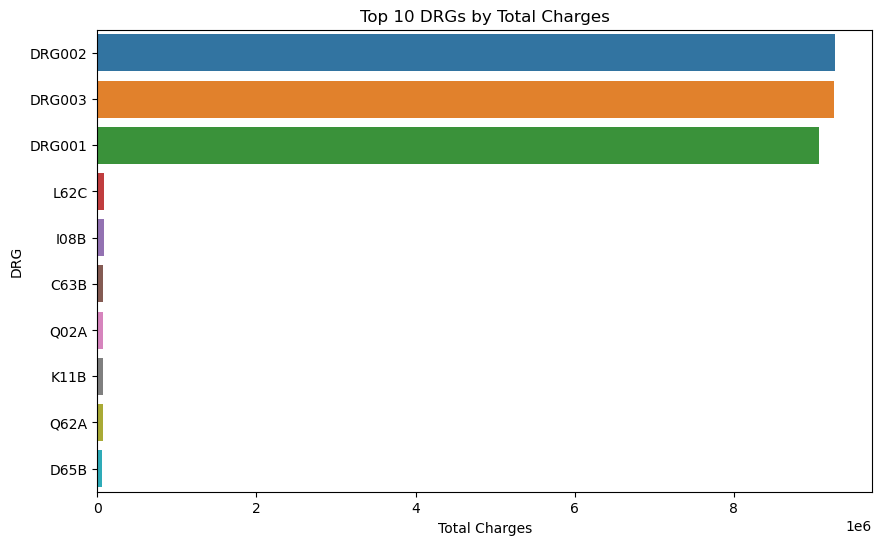

In [80]:
# Bar plot for DRG charges
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalCharges', y='AR-DRG', data=drg_charges.head(10))
plt.title('Top 10 DRGs by Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('DRG')
plt.show()


Summary of Bar Plot Analysis
High-Cost DRGs:

The plot shows total charges for the top 10 DRGs, with DRG002 having the highest charges, followed by DRG003 and DRG001.

Cost Implications:

Identifying high-cost DRGs can help focus management efforts on cases that drive up expenses, potentially linked to complex treatments or longer hospital stays.

Variability Insights:

Differences in charges among DRGs suggest variations in treatment complexity, patient demographics, or resource use. Close totals warrant further investigation.

Further Analysis Recommendations:

Explore correlations between charges and factors like Length of Stay, care types (inpatient vs. outpatient), and patient demographics to gain deeper insights.

Conclusion
The bar plot effectively highlights financial impacts across different DRGs, aiding informed decision-making in resource allocation and operational efficiency. Further analysis could enhance patient care and reduce costs.

# 2. Checking TotalCharges changeswith other influencing parameters
LengthOfStay (To gain clearer insights into the impact of the LengthOfStay parameter, we categorized its values into 5-day intervals.)

CareType

ModeOfSeparation

DischargeIntention

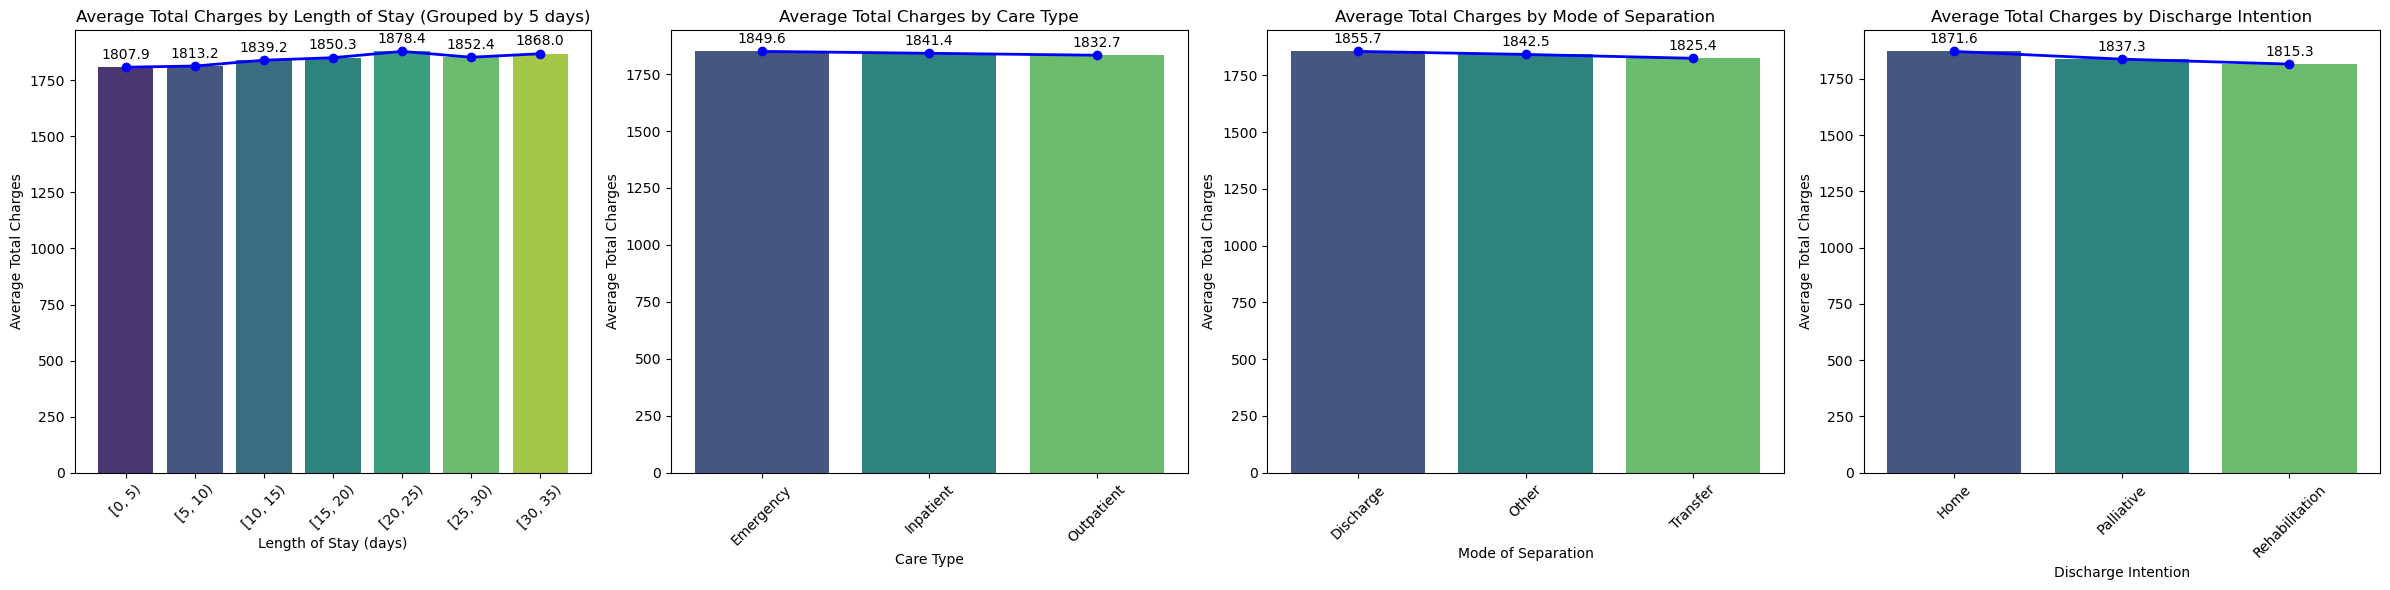

In [171]:

# Group the data by LengthOfStay in intervals of 5 days
max_length_of_stay = math.ceil(df['LengthOfStay'].max())  # Round up to the nearest integer
df['LengthOfStayGroup'] = pd.cut(df['LengthOfStay'], bins=range(0, max_length_of_stay + 5, 5), right=False)

# Group the data by CareType, ModeofSeparation, and DischargeIntention
length_of_stay_summary = df.groupby('LengthOfStayGroup')['TotalCharges'].mean().reset_index()
care_type_summary = df.groupby('CareType')['TotalCharges'].mean().reset_index()
mode_of_separation_summary = df.groupby('ModeOfSeparation')['TotalCharges'].mean().reset_index()
discharge_intention_summary = df.groupby('DischargeIntention')['TotalCharges'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(24, 6))

# Create the first bar plot for LengthOfStay (grouped in intervals of 5 days)
plt.subplot(1, 4, 1)
ax1 = sns.barplot(x='LengthOfStayGroup', y='TotalCharges', data=length_of_stay_summary, palette='viridis')
plt.title('Average Total Charges by Length of Stay (Grouped by 5 days)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=45)

# Add values on top of each bar for LengthOfStay
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9),
                 textcoords='offset points')

# Draw line to show trend for LengthOfStay
plt.plot(length_of_stay_summary['LengthOfStayGroup'].astype(str), length_of_stay_summary['TotalCharges'], color='blue', marker='o', linestyle='-', linewidth=2)

# Create the second bar plot for CareType
plt.subplot(1, 4, 2)
ax2 = sns.barplot(x='CareType', y='TotalCharges', data=care_type_summary, palette='viridis')
plt.title('Average Total Charges by Care Type')
plt.xlabel('Care Type')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=45)

# Add values on top of each bar for CareType
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9),
                 textcoords='offset points')

# Draw line to show trend for CareType
plt.plot(care_type_summary['CareType'], care_type_summary['TotalCharges'], color='blue', marker='o', linestyle='-', linewidth=2)

# Create the third bar plot for ModeofSeparation
plt.subplot(1, 4, 3)
ax3 = sns.barplot(x='ModeOfSeparation', y='TotalCharges', data=mode_of_separation_summary, palette='viridis')
plt.title('Average Total Charges by Mode of Separation')
plt.xlabel('Mode of Separation')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=45)

# Add values on top of each bar for ModeofSeparation
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9),
                 textcoords='offset points')

# Draw line to show trend for ModeofSeparation
plt.plot(mode_of_separation_summary['ModeOfSeparation'], mode_of_separation_summary['TotalCharges'], color='blue', marker='o', linestyle='-', linewidth=2)

# Create the fourth bar plot for DischargeIntention
plt.subplot(1, 4, 4)
ax4 = sns.barplot(x='DischargeIntention', y='TotalCharges', data=discharge_intention_summary, palette='viridis')
plt.title('Average Total Charges by Discharge Intention')
plt.xlabel('Discharge Intention')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=45)

# Add values on top of each bar for DischargeIntention
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9),
                 textcoords='offset points')

# Draw line to show trend for DischargeIntention
plt.plot(discharge_intention_summary['DischargeIntention'], discharge_intention_summary['TotalCharges'], color='blue', marker='o', linestyle='-', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.show()


Analyzing Trends

Length of Stay:

A longer length of stay is generally associated with higher total charges.
The bar chart showing the relationship between LengthOfStayGroup and Average Total Charges likely confirms this trend.
DRGs with higher average lengths of stay are more likely to have higher total charges.

Care Type:

Different care types ( Emergency, Inpatient, and Outpatient) may have varying cost structures.
The bar chart comparing Average Total Charges by CareType can reveal if certain care types are consistently associated with higher costs.
For example, Emergency care might generally have higher charges.

Mode of Separation:

The mode of separation can also influence total charges.
Patients transferred to other facilities might have higher charges due to additional coordination and paperwork.
Those who Discharged might have higher charges due to intensive care provided in their final days.

Discharge Intention:

The discharge intention can provide insights into the patient's condition and the level of care required.
For example, patients discharged to a  home might have more complex medical conditions and higher charges.
This could be because patients discharged to home require a complete and final course of treatment and care, which can result in higher overall treatment costs.

# 3. Examining the trend of changes and distribution of TotalCharges and LengthOfStay

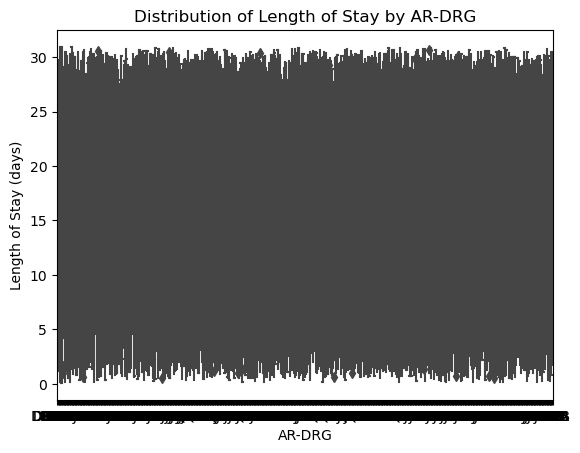

In [114]:
# Create a box plot to visualize the distribution of LengthOfStay for each DRG
sns.boxplot(x='AR-DRG', y='LengthOfStay', data=df)
plt.title('Distribution of Length of Stay by AR-DRG')
plt.xlabel('AR-DRG')
plt.ylabel('Length of Stay (days)')
plt.show()


Considering the large number of DRG categories, the distribution plot is not very clear and interpretable. It might be beneficial to create larger categories.

# Important point


To enhance clarity and facilitate analysis, this research focused on creating AR-DRG and TotalCharges charts for the top 10 highest-cost DRGs.

C:\Users\asus\AppData\Local\Temp\ipykernel_19680\3094406079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AR-DRG'] = pd.Categorical(filtered_df['AR-DRG'], categories=top_10_drgs_sorted, ordered=True)


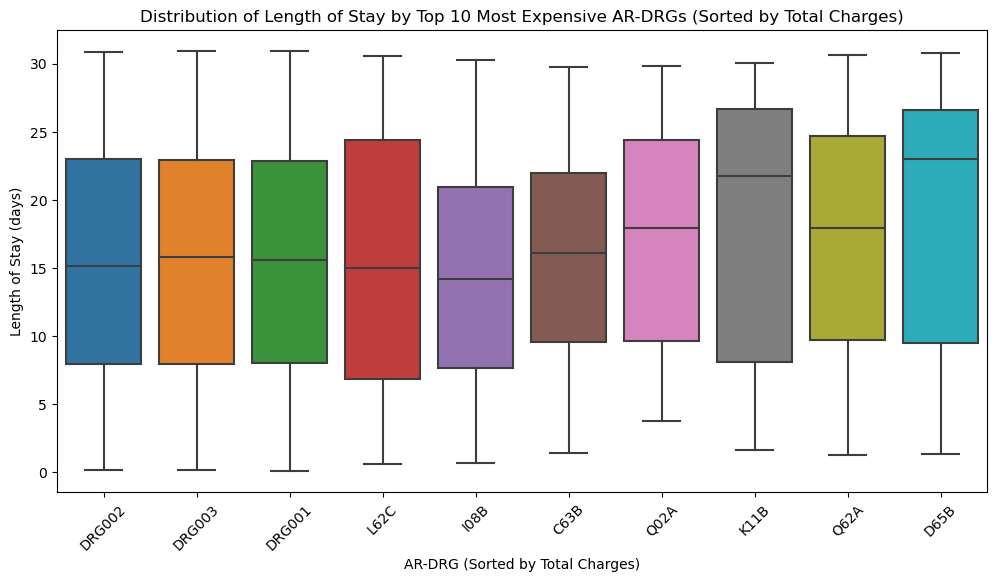

In [173]:
# Group by AR-DRG and calculate the total charges for each AR-DRG
drg_total_charges = df.groupby('AR-DRG')['TotalCharges'].sum()

# Get the top 10 AR-DRGs by total charges, sorted by charges in descending order
top_10_drgs_sorted = drg_total_charges.nlargest(10).index

# Filter the DataFrame to include only the top 10 most expensive AR-DRGs
filtered_df = df[df['AR-DRG'].isin(top_10_drgs_sorted)]

# Sort the filtered DataFrame by AR-DRG according to the total charges
filtered_df['AR-DRG'] = pd.Categorical(filtered_df['AR-DRG'], categories=top_10_drgs_sorted, ordered=True)

# Create a box plot to visualize the distribution of LengthOfStay for the top 10 AR-DRGs
plt.figure(figsize=(12, 6))
sns.boxplot(x='AR-DRG', y='LengthOfStay', data=filtered_df, order=top_10_drgs_sorted)
plt.title('Distribution of Length of Stay by Top 10 Most Expensive AR-DRGs (Sorted by Total Charges)')
plt.xlabel('AR-DRG (Sorted by Total Charges)')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45)
plt.show()


Now, we want to examine the variations of AR-DRG in relation to all influencing columns.

C:\Users\asus\AppData\Local\Temp\ipykernel_19680\3676056996.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AR-DRG'] = pd.Categorical(filtered_df['AR-DRG'], categories=top_10_drgs_sorted, ordered=True)


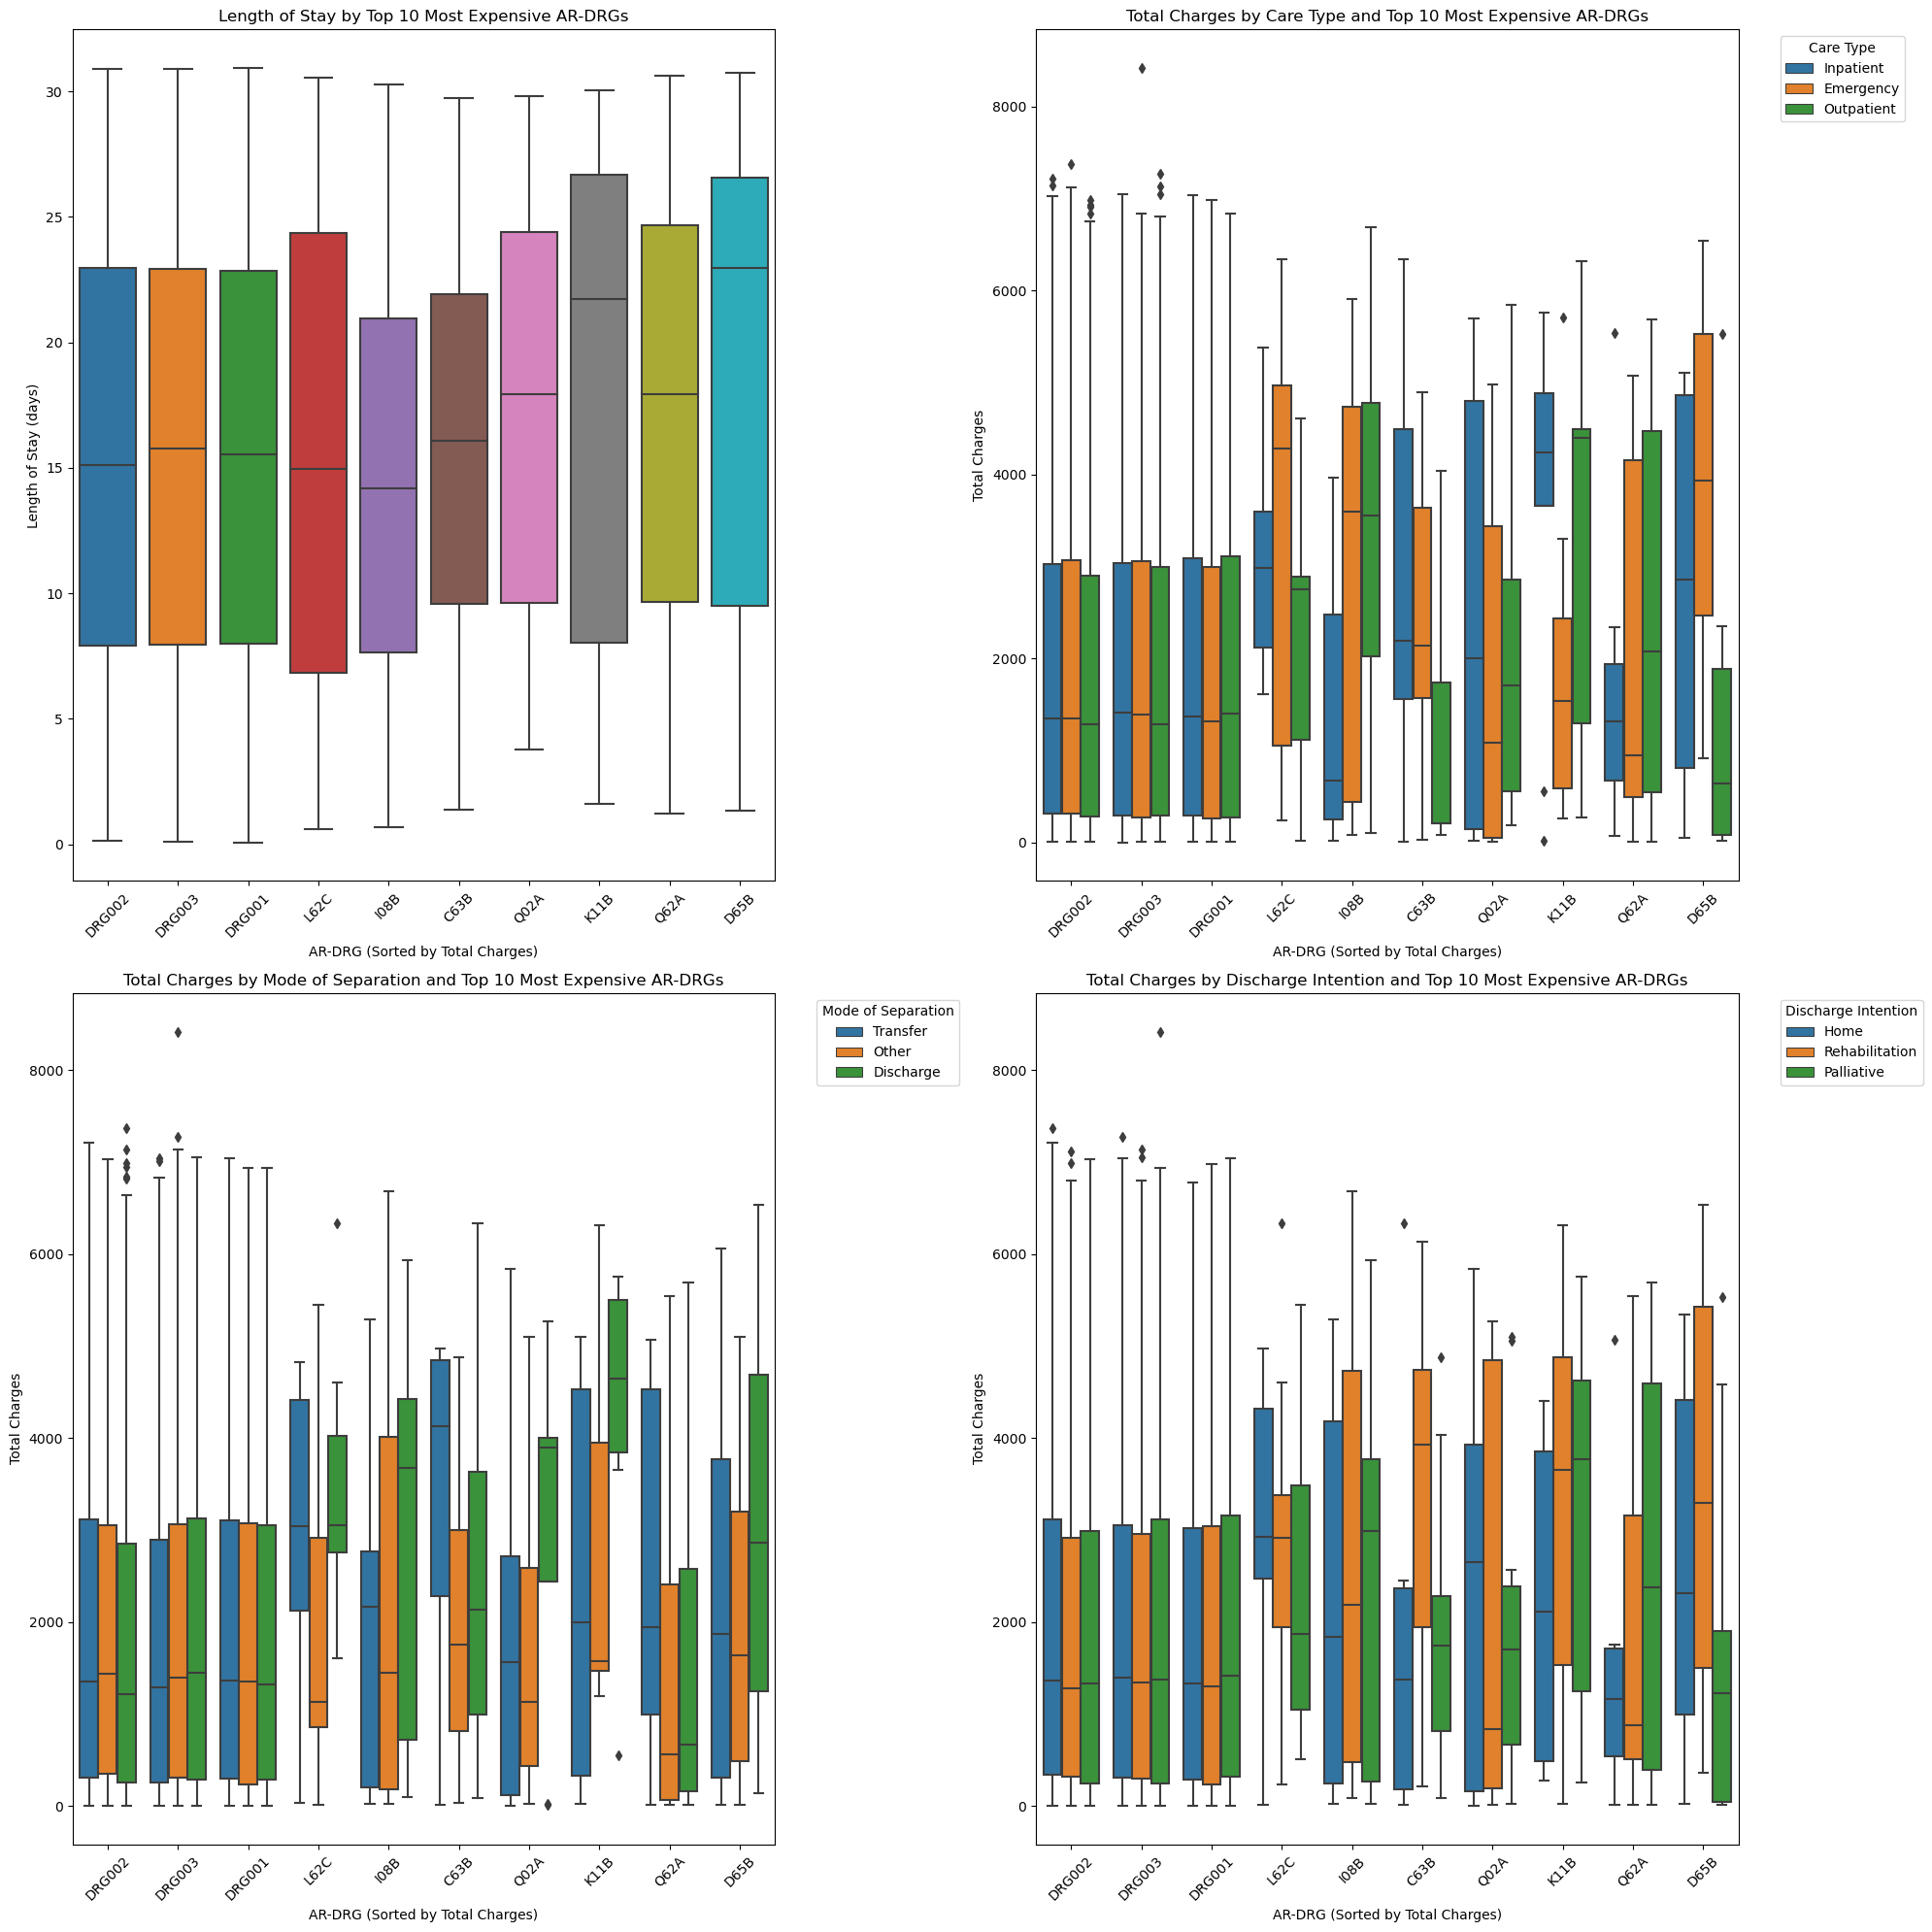

In [175]:

# Group by AR-DRG and calculate the total charges for each AR-DRG
drg_total_charges = df.groupby('AR-DRG')['TotalCharges'].sum()

# Get the top 10 AR-DRGs by total charges, sorted by charges in descending order
top_10_drgs_sorted = drg_total_charges.nlargest(10).index

# Filter the DataFrame to include only the top 10 most expensive AR-DRGs
filtered_df = df[df['AR-DRG'].isin(top_10_drgs_sorted)]

# Sort the filtered DataFrame by AR-DRG according to the total charges
filtered_df['AR-DRG'] = pd.Categorical(filtered_df['AR-DRG'], categories=top_10_drgs_sorted, ordered=True)

# Create a new figure for plotting all four comparisons
plt.figure(figsize=(20, 20))

# 1. AR-DRG and LengthOfStay
plt.subplot(2, 2, 1)
sns.boxplot(x='AR-DRG', y='LengthOfStay', data=filtered_df, order=top_10_drgs_sorted)
plt.title('Length of Stay by Top 10 Most Expensive AR-DRGs')
plt.xlabel('AR-DRG (Sorted by Total Charges)')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45)

# 2. AR-DRG and CareType
plt.subplot(2, 2, 2)
sns.boxplot(x='AR-DRG', y='TotalCharges', hue='CareType', data=filtered_df, order=top_10_drgs_sorted)
plt.title('Total Charges by Care Type and Top 10 Most Expensive AR-DRGs')
plt.xlabel('AR-DRG (Sorted by Total Charges)')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.legend(title='Care Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. AR-DRG and ModeOfSeparation
plt.subplot(2, 2, 3)
sns.boxplot(x='AR-DRG', y='TotalCharges', hue='ModeOfSeparation', data=filtered_df, order=top_10_drgs_sorted)
plt.title('Total Charges by Mode of Separation and Top 10 Most Expensive AR-DRGs')
plt.xlabel('AR-DRG (Sorted by Total Charges)')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.legend(title='Mode of Separation', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. AR-DRG and DischargeIntention
plt.subplot(2, 2, 4)
sns.boxplot(x='AR-DRG', y='TotalCharges', hue='DischargeIntention', data=filtered_df, order=top_10_drgs_sorted)
plt.title('Total Charges by Discharge Intention and Top 10 Most Expensive AR-DRGs')
plt.xlabel('AR-DRG (Sorted by Total Charges)')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.legend(title='Discharge Intention', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


 - The highest-cost AR-DRGs are typically associated with hospital stays ranging from 8 to 23 days.
 - The most expensive AR-DRGs are primarily linked to care types, in order, of emergency, inpatient, and outpatient services.
 - For the highest-cost AR-DRGs, discharge and transfer modes of separation tend to incur higher costs.
 - For the top 3 most expensive AR-DRGs, there are no significant differences between the various discharge intentions.
   For the next 7 most expensive AR-DRGs, rehabilitation stands out as the most costly discharge intention.


# Part 3 Question 4
Write an SQL query to calculate the total and average admissions for each month over the last two years. Include the month and year in the results.

# Query 

In [ ]:
SELECT 
    YEAR_,
	MONTH_,
    Sum (TotalAdmissions_PerDay) AS TotalAdmissions, 
    AVG (TotalAdmissions_PerDay) AS AverageAdmissions
	from
(
SELECT 
    AdmissionDate,
	YEAR(AdmissionDate) as YEAR_, 
    MONTH(AdmissionDate) as MONTH_,
    COUNT(*) AS TotalAdmissions_PerDay   
FROM 
    dbo.ramsay 
WHERE 
    AdmissionDate >= DATEADD(YEAR, -2, GETDATE()) -- Last two years
GROUP BY 
    AdmissionDate,
	YEAR(AdmissionDate), 
    MONTH(AdmissionDate)
) AS Admissions
GROUP BY 
    YEAR_, 
    MONTH_
ORDER BY 
    Year_ DESC, 
    Month_;


# Result of Query 


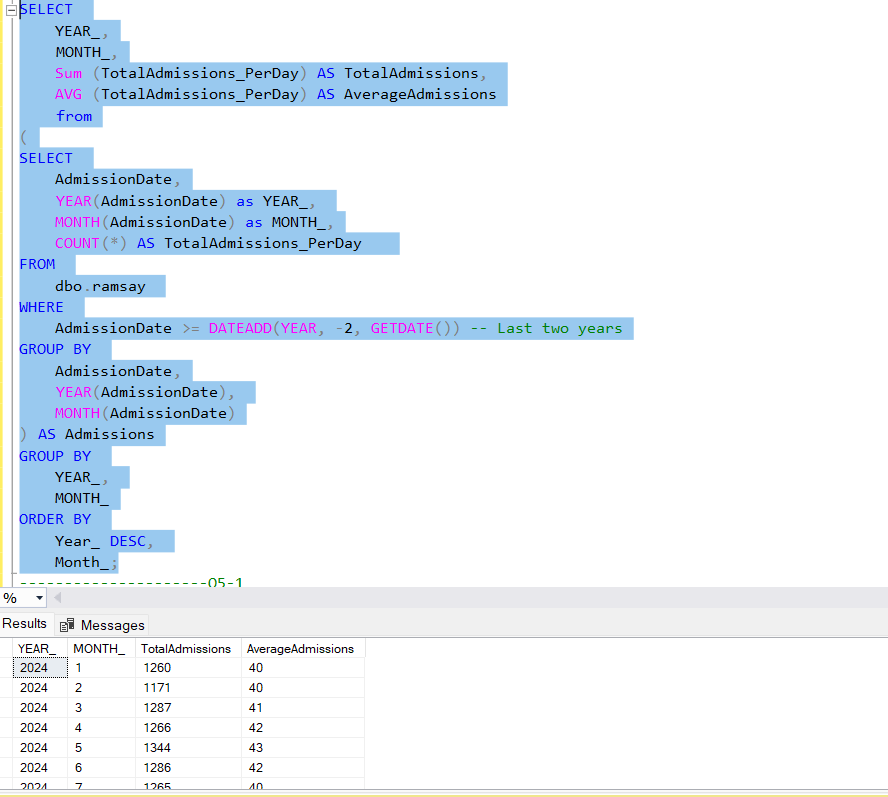

# Part 3 Question 5
Write an SQL query to analyse the distribution of TotalCharges by PrincipalDiagnosis and Sex. Use percentiles to describe the distribution.



The columns listed below represent various charges:

AccommodationCharge
BundledCharges
CCU_Charges
ICU_Charge
OtherCharges
ProsthesisCharge
TheatreCharge
PharmacyCharge
However, it is important to note that the values within the PharmacyCharge column are likely invalid due to their unusually large magnitude. For instance, the value 2.8708801485514914e+122, which consists of 122 digits, is clearly not a realistic representation of a pharmaceutical charge.

To address this issue, it is recommended to consult with experienced professionals who can provide guidance on data cleaning and validation techniques.

For the purpose of this analysis, we will exclude the PharmacyCharge column from the calculation of TotalCharges.


# Query 

In [ ]:
WITH Charges AS (
    SELECT 
        PrincipalDiagnosis,
        Sex,
        ISNULL(TRY_CAST(AccommodationCharge AS FLOAT), 0) + 
        ISNULL(TRY_CAST(BundledCharges AS FLOAT), 0) +
        ISNULL(TRY_CAST(CCU_Charges AS FLOAT), 0) +
        ISNULL(TRY_CAST(ICU_Charge AS FLOAT), 0) +
        ISNULL(TRY_CAST(OtherCharges AS FLOAT), 0) +
        ISNULL(TRY_CAST(ProsthesisCharge AS FLOAT), 0) +
        ISNULL(TRY_CAST(TheatreCharge AS FLOAT), 0) AS TotalCharges
    FROM 
        dbo.ramsay  -- Replace with your actual table name
)
SELECT DISTINCT
    PrincipalDiagnosis,
    Sex,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY TotalCharges) OVER (PARTITION BY PrincipalDiagnosis, Sex) AS P25,
    PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY TotalCharges) OVER (PARTITION BY PrincipalDiagnosis, Sex) AS P50,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY TotalCharges) OVER (PARTITION BY PrincipalDiagnosis, Sex) AS P75,
    COUNT(*) OVER (PARTITION BY PrincipalDiagnosis, Sex) AS NumberOfEntries,
    SUM(TotalCharges) OVER (PARTITION BY PrincipalDiagnosis, Sex) AS SumOfCharges
FROM 
    Charges
ORDER BY 
    PrincipalDiagnosis,
    Sex;

# Result of Query 

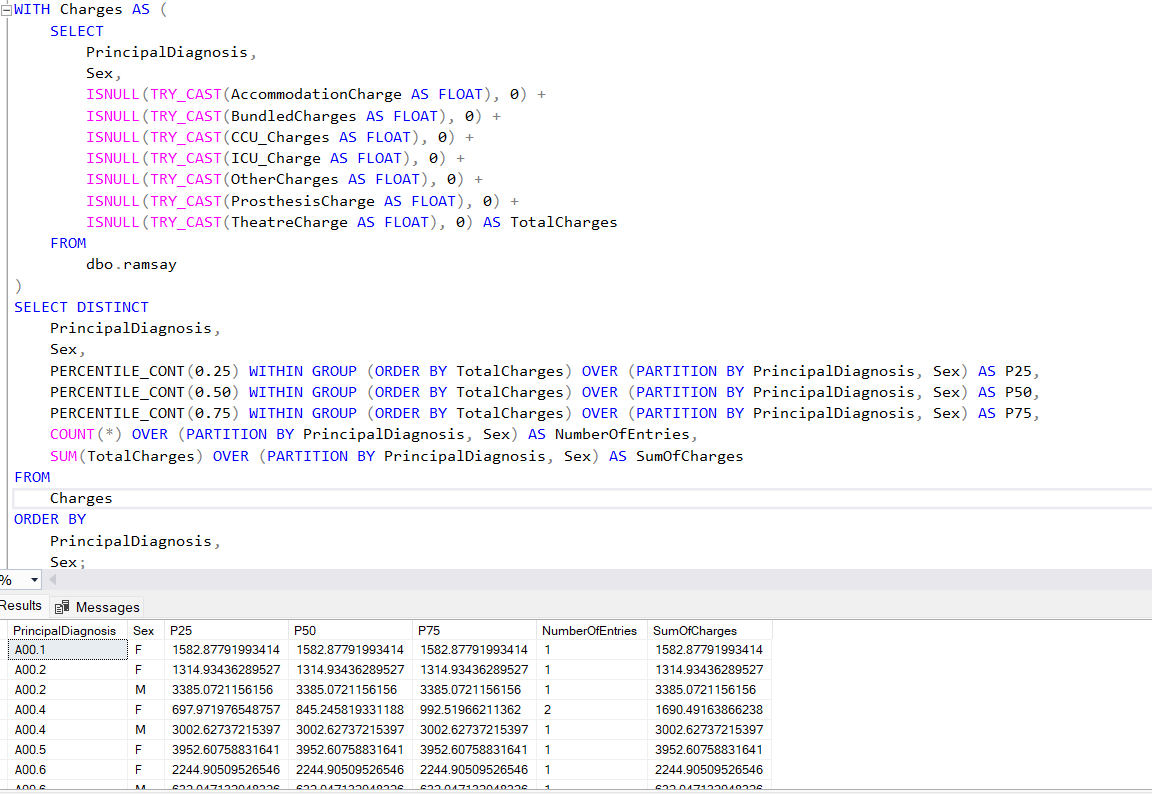

As seen in the query results, each combination of PrincipalDiagnosis and Sex contains only a limited number of patients. This indicates that due to the high diversity of PrincipalDiagnosis and Sex, a meaningful analysis cannot be conducted.
For instance, for patients with PrincipalDiagnosis = A00.1 and Sex = F, there is only one patient.
Therefore, analysis in this case is meaningless, and it would be better to have larger categories to obtain better results for the distribution of total costs by diagnosis and sex.

Based on my research, the first letter in the PrincipalDiagnosis code represents the main category of the disease family.
Therefore, a new value named PrincipalDiagnosis_Category can be defined.
(But, Both letters A and B are used to classify infectious diseases, while C and D refer to benign neoplasms or malignant tumors.
Therefore, it is better to use a broader and more accurate classification provided by experts to ensure a correct analysis.)

For the case where we use the first letter of PrincipalDiagnosis to create a broader category, the following query was substituted.

# Query 

In [ ]:
WITH Charges AS (
    SELECT 
        left (PrincipalDiagnosis,1) PrincipalDiagnosis_Category,
        Sex,
        ISNULL(TRY_CAST(AccommodationCharge AS FLOAT), 0) +
        ISNULL(TRY_CAST(BundledCharges AS FLOAT), 0) +
        ISNULL(TRY_CAST(CCU_Charges AS FLOAT), 0) +
        ISNULL(TRY_CAST(ICU_Charge AS FLOAT), 0) +
        ISNULL(TRY_CAST(OtherCharges AS FLOAT), 0) +
        ISNULL(TRY_CAST(ProsthesisCharge AS FLOAT), 0) +
        ISNULL(TRY_CAST(TheatreCharge AS FLOAT), 0) AS TotalCharges
    FROM 
        dbo.ramsay  
)
SELECT DISTINCT
    PrincipalDiagnosis_Category,
    Sex,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY TotalCharges) OVER (PARTITION BY PrincipalDiagnosis_Category, Sex) AS P25,
    PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY TotalCharges) OVER (PARTITION BY PrincipalDiagnosis_Category, Sex) AS P50,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY TotalCharges) OVER (PARTITION BY PrincipalDiagnosis_Category, Sex) AS P75,
    COUNT(*) OVER (PARTITION BY PrincipalDiagnosis_Category, Sex) AS NumberOfEntries,
    SUM(TotalCharges) OVER (PARTITION BY PrincipalDiagnosis_Category, Sex) AS SumOfCharges
FROM 
    Charges
ORDER BY 
    PrincipalDiagnosis_Category,
    Sex;
    

# Result of Query 


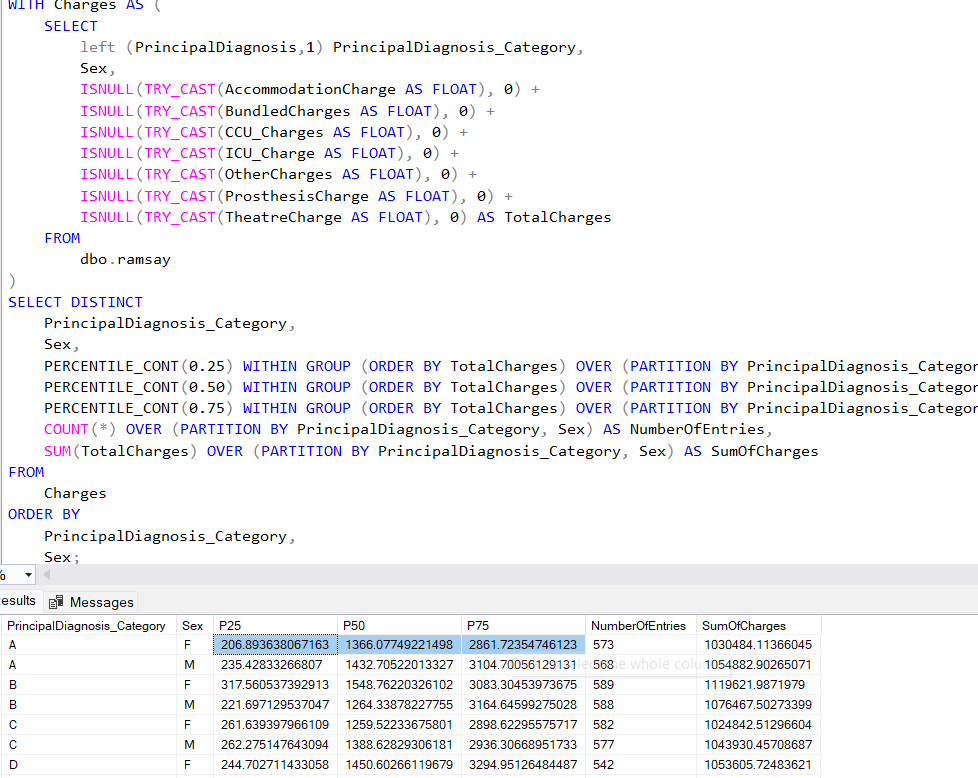

In this scenario, the results become significantly more interpretable and understandable. For example, considering patients with main diagnosis "A" and gender "F", a group of 573 people is obtained. For this specific group:

25% of patients (P25) have total costs below 206.893638067163.
50% of patients (P50 or median) have total costs below 1366.07749221498.
75% of patients (P75) have total costs below 2861.72354746123.

# Part 4 Question 6
Based on your analysis, identify two strategic insights that could help Ramsay improve hospital operations or patient care. Justify your insights with evidence from your data analysis.

Based on the analysis of admissions, charges, and lengths of stay, here are two strategic insights that could help Ramsay improve hospital operations or patient care:

# 1st strategic insights
Focus on High-Charge DRGs for Cost Management and increasing the variety of services to patients

insight:

Reducing AR-DRG costs for the hospital and increasing the variety of services to patients. Some diagnosis-related groups (AR-DRGs), such as DRG002, DRG001, and DRG003, have significantly higher costs than others.

Justification:

Analysis of the cost distribution across AR-DRGs reveals that specific AR-DRGs consistently appear in higher cost percentiles. A strategy to enhance cost management involves a detailed analysis of these high-cost AR-DRGs to identify operational inefficiencies or opportunities to streamline care without compromising quality. For instance, examining care pathways and optimizing resource allocation (such as staffing and equipment) for these high-cost AR-DRGs can yield significant cost savings while maintaining patient care standards.

Furthermore, offering a wide range of specialties to enhance patient satisfaction is crucial for a hospital. Increasing the hospital's capacity is also vital. Expanding "Rehabilitation" services is of paramount importance, as minimizing "Transfers" can lead to higher patient satisfaction and increased hospital revenue. As demonstrated in the analysis of ModeOfSeparation and TotalCharges, shifting "Rehabilitation" cases to "Discharge" cases can both enhance the quality of care and patient satisfaction, while simultaneously increasing revenue.

Practical Steps:

Comprehensive Analysis of High-Cost AR-DRGs: Conduct a thorough examination of high-cost AR-DRGs to identify opportunities for cost reduction and quality improvement.

Expansion of "Rehabilitation" Services and Reduction of "Transfers": Expand rehabilitation services and minimize patient "Transfers" to enhance patient satisfaction and increase hospital revenue.


# 2nd strategic insight
Improve Admission and Discharge Efficiency During Non-Office Hours

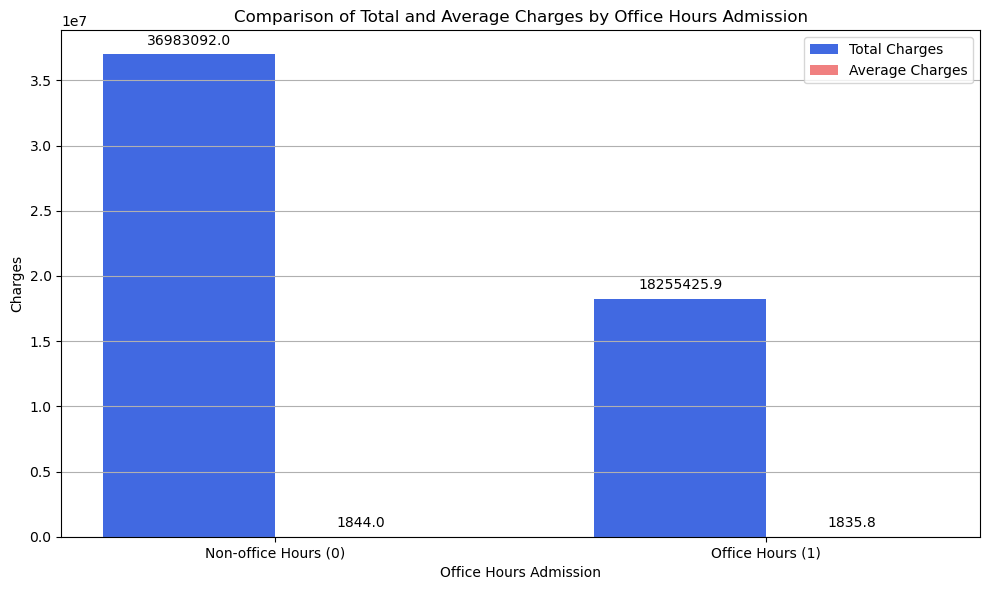

In [182]:

# Calculate total and average charges for each OfficeHoursAdmission category
charges_summary = df.groupby('OfficeHoursAdmission')['TotalCharges'].agg(['sum', 'mean']).reset_index()
charges_summary.columns = ['OfficeHoursAdmission', 'TotalCharges', 'AverageCharges']

# Create a bar plot to compare total and average charges
plt.figure(figsize=(10, 6))

# Set position of bar on X axis
bar_width = 0.35
x = range(len(charges_summary))

# Create bars for total charges
bars1 = plt.bar(x, charges_summary['TotalCharges'], width=bar_width, label='Total Charges', color='royalblue')

# Create bars for average charges, slightly shifted to the right
bars2 = plt.bar([p + bar_width for p in x], charges_summary['AverageCharges'], width=bar_width, label='Average Charges', color='lightcoral')

# Add value annotations on top of the bars
for bar in bars1:
    plt.annotate(format(bar.get_height(), '.1f'), 
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=10, color='black', 
                 xytext=(0, 5), 
                 textcoords='offset points')

for bar in bars2:
    plt.annotate(format(bar.get_height(), '.1f'), 
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=10, color='black', 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.title('Comparison of Total and Average Charges by Office Hours Admission')
plt.xlabel('Office Hours Admission')
plt.ylabel('Charges')
plt.xticks([p + bar_width / 2 for p in x], ['Non-office Hours (0)', 'Office Hours (1)'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Insight: 

Admissions and discharges outside of normal office hours (late at night or early in the morning) are associated with significantly higher total costs for patients. Patients who are hospitalized during this period often incur higher costs for various reasons such as delays in receiving care or appropriate diagnoses.

Justification:

Analysis of the AdmissionTime attribute and its impact on TotalCharges showed that patients admitted after office hours have higher average charges. This may be attributed to delays in diagnostic tests and consultation with specialists, all of which can increase costs for these patients.

Actionable Steps:

Increased staffing during peak admission hours, especially in emergency departments such as emergency services, to ensure timely care and provide better services to patients